In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [50]:
DATA_SET = pd.read_csv('./hrt.csv')
DATA_SET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
DATA_SET.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
DATA_SET = pd.DataFrame(DATA_SET,columns = ['cp', 'ca', 'thal','age', 'chol', 'oldpeak', 'target'])
DATA_SET.head()

,cp,ca,thal,age,chol,oldpeak,target
0,3,0,1,63,233,2.3,1
1,2,0,2,37,250,3.5,1
2,1,0,2,41,204,1.4,1
3,1,0,2,56,236,0.8,1
4,0,0,2,57,354,0.6,1


In [53]:
DATA_SET = pd.get_dummies(DATA_SET, columns = ['cp', 'ca', 'thal'])
DATA_SET.head()

,age,chol,oldpeak,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,233,2.3,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,37,250,3.5,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,41,204,1.4,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,56,236,0.8,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,57,354,0.6,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [54]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'chol', 'oldpeak']
DATA_SET[columns_to_scale] = standardScaler.fit_transform(DATA_SET[columns_to_scale])
DATA_SET.head()

,age,chol,oldpeak,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,-0.256334,1.087338,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,-1.915313,0.072199,2.122573,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.816773,0.310912,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0.180175,-0.198357,-0.206705,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0.290464,2.082050,-0.379244,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [55]:
Y = DATA_SET['target'].values
X = DATA_SET.drop(['target'], axis = 1).values

In [56]:
def get_score(model):
    ssplit=ShuffleSplit(n_splits=10,test_size=0.25,random_state = 0)
    results=cross_val_score(model,X,Y,cv=ssplit)
    return np.mean(results)

## Logistic Regression

In [57]:
get_score(LogisticRegression())*(100)

84.07894736842107

## KNN

In [58]:
KNN_scores = []
for k in range(1,21,1):
    KNN_model = KNeighborsClassifier(n_neighbors = k)
    KNN_scores.append(get_score(KNN_model)*100)

In [59]:
for score in KNN_scores:
    print(score)

78.02631578947367
78.68421052631578
83.02631578947368
82.76315789473682
84.07894736842107
82.89473684210527
84.60526315789474
84.07894736842107
83.94736842105263
83.55263157894737
83.42105263157895
83.8157894736842
83.94736842105263
83.94736842105263
83.55263157894737
83.55263157894737
83.28947368421053
83.42105263157895
82.76315789473685
82.76315789473682


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

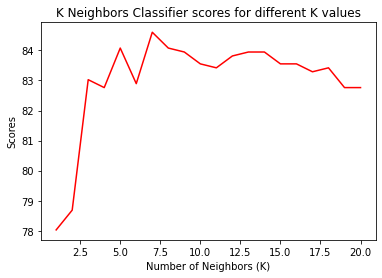

In [60]:
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
# for i in range(1,10):
#     plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
# plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [61]:
max_KNN_score  = -1
max_KNN_neigb = -1
for index, val in enumerate(KNN_scores):
    if(max_KNN_score < val):
        max_KNN_score = val
        max_KNN_neigb = index+1
max_KNN_neigb

7

In [62]:
get_score(KNeighborsClassifier(n_neighbors = 12))*100

83.8157894736842

## SVM

In [63]:
SVM_scores = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    model_SVM = SVC(kernel = kernels[i])
    SVM_scores[kernels[i]] = (get_score(model_SVM))
SVM_scores

{'linear': 0.8513157894736842,
 'poly': 0.8328947368421054,
 'rbf': 0.843421052631579,
 'sigmoid': 0.825}

In [64]:
get_score(SVC(kernel = 'linear')) * 100

85.13157894736842

## Decision Tree

In [65]:
DT_scores = []
for i in range(1, len(DATA_SET.columns)):
    model_DT = DecisionTreeClassifier(max_features = i, random_state = 0)
    DT_scores.append(get_score(model_DT))
DT_scores

[0.775,
 0.756578947368421,
 0.7776315789473685,
 0.7578947368421052,
 0.7710526315789474,
 0.775,
 0.7684210526315789,
 0.7592105263157894,
 0.768421052631579,
 0.7776315789473685,
 0.7828947368421051,
 0.7578947368421053,
 0.775,
 0.7815789473684209,
 0.7842105263157896,
 0.7842105263157895]

Text(0.5, 1.0, 'DT Classifier Accuracy for different Max Features')

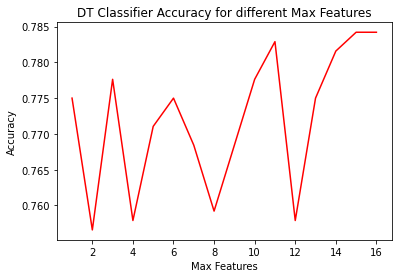

In [66]:
plt.plot([k for k in range(1, len(DATA_SET.columns))], DT_scores, color = 'red')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('DT Classifier Accuracy for different Max Features')

In [67]:
max_DT_score  = -1
max_feature = -1
for index, val in enumerate(DT_scores):
    if(max_DT_score < val):
        max_DT_score = val
        max_feature = index + 1
max_feature

15

In [68]:
get_score(DecisionTreeClassifier(max_features = max_feature, random_state = 0))*100

78.42105263157896

## Random Forest

In [69]:
RF_scores = {}
estimators = range(100,1000,250)
for i in estimators:
    model_RF = RandomForestClassifier(n_estimators = i, random_state = 0)
    RF_scores[i] = (get_score(model_RF))
RF_scores

{100: 0.8171052631578947,
 350: 0.8236842105263158,
 600: 0.8315789473684211,
 850: 0.8289473684210525}

In [70]:
get_score(RandomForestClassifier(n_estimators = 100, random_state = 0)) * 100

81.71052631578947

## Naive Bayes

In [71]:
get_score(GaussianNB())*100

72.89473684210527